# Particle Diffusion
|Author | Stanley A. Baronett|
|-------|--------------------|
|Created|  1/31/2022         |
|Updated|  6/23/2022         |

## Python Imports

In [1]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Absolute Maximum Particle Velocities (Final Snapshot)

In [7]:
runs = ['AB', 'BA']
Pis = [0.01, 0.02, 0.05, 0.10]
res = 2048
dirs = ['v_p,x', 'v_p,z']
vels = [None, None]
vpmaxs = [[[4.9014116835902712e-02, 6.9901924241410424e-02],
           [1.1131780624371951e-01, 1.2851029144559772e-01],
           [2.1246485981185287e-01, 2.7507636579252753e-01],
           [4.2330050901055599e-01, 5.4153697266332279e-01]],
          [[1.6028950749236612e-01, 1.0658793968704268e-01],
           [3.7310835676954823e-01, 2.1727610846700082e-01],
           [8.1245752475401367e-01, 3.6080757214776110e-01],
           [9.7114961815499423e-01, 5.7261392023932234e-01]]] # vpmaxs[run][Pi][dir]

for i, run in enumerate(runs):
    for j, Pi in enumerate(Pis):
        athinput = athena_read.athinput(f'../unstrat/{run:s}/{Pi:.2f}/{res:n}/athinput.si')
        Lx = athinput['mesh']['x1max'] - athinput['mesh']['x1min'] # [H]
        if Pi == 0.01:
            print(f'\n{run} (Lx = Lz = {Lx} / H)')
        print(f'  Π = {Pi:.2f}')

        for k, dir in enumerate(dirs):
            vels[k] = vpmaxs[i][j][k]/Lx/2
            print(f'    |{dir:s},max| = {vels[k]:.2f} [(L/2)/T]')
        
        Dt = 1/np.amax(vels)
        print(f'         dt_max = {Dt:.2f} [T/(L/2)]')



AB (Lx = Lz = 0.1 / H)
  Π = 0.01
    |v_p,x,max| = 0.25 [(L/2)/T]
    |v_p,z,max| = 0.35 [(L/2)/T]
         dt_max = 2.86 [T/(L/2)]
  Π = 0.02
    |v_p,x,max| = 0.56 [(L/2)/T]
    |v_p,z,max| = 0.64 [(L/2)/T]
         dt_max = 1.56 [T/(L/2)]
  Π = 0.05
    |v_p,x,max| = 1.06 [(L/2)/T]
    |v_p,z,max| = 1.38 [(L/2)/T]
         dt_max = 0.73 [T/(L/2)]
  Π = 0.10
    |v_p,x,max| = 2.12 [(L/2)/T]
    |v_p,z,max| = 2.71 [(L/2)/T]
         dt_max = 0.37 [T/(L/2)]

BA (Lx = Lz = 2.0 / H)
  Π = 0.01
    |v_p,x,max| = 0.04 [(L/2)/T]
    |v_p,z,max| = 0.03 [(L/2)/T]
         dt_max = 24.95 [T/(L/2)]
  Π = 0.02
    |v_p,x,max| = 0.09 [(L/2)/T]
    |v_p,z,max| = 0.05 [(L/2)/T]
         dt_max = 10.72 [T/(L/2)]
  Π = 0.05
    |v_p,x,max| = 0.20 [(L/2)/T]
    |v_p,z,max| = 0.09 [(L/2)/T]
         dt_max = 4.92 [T/(L/2)]
  Π = 0.10
    |v_p,x,max| = 0.24 [(L/2)/T]
    |v_p,z,max| = 0.14 [(L/2)/T]
         dt_max = 4.12 [T/(L/2)]


## Diffusion Coefficients

In [70]:
import sys
sys.path.insert(0, '/home/stanley/github/sabaronett/local/athena/athena-dust/vis/python')
import athena_read
import numpy as np
from pathlib import Path

cases = ['AB', 'BA']
reses = ['256', '2048']

print('Case\tτₛ\tε\tΠ\tRes.\tD_x\t   D_z')
print('\t\t\t\t\t[cₛ²/Ω]   [cₛ²/Ω]')
print('===========================================================')

for case in cases:
    for res in reses:
        if case == 'BA' and res == '2048':
            exit
        else:
            path = f'../unstrat/{case}/0.05/{res}'
            athinput = athena_read.athinput(f'{path}/athinput.si')
            epsilon = athinput['problem']['epsilon']
            pi = athinput['problem']['duy0']
            dcoeff = np.load(f'{path}/output/dcoeff.npz')
            taus, dpx, dpz =  dcoeff['taus'], dcoeff['dpx'][0], dcoeff['dpz'][0]
            
            print(f'{case}\t{taus:.1f}\t{epsilon:.1f}\t{pi:.2f}\t{res}²\t{dpx/2/np.pi:.1e}\t   {dpz/2/np.pi:.1e}')
    
    print('-----------------------------------------------------------')


Case	τₛ	ε	Π	Res.	D_x	   D_z
					[cₛ²/Ω]   [cₛ²/Ω]
AB	0.1	1.0	0.05	256²	5.1e-05	   6.7e-05
AB	0.1	1.0	0.05	2048²	3.5e-05	   2.3e-05
-----------------------------------------------------------
BA	1.0	0.2	0.05	256²	1.8e-03	   2.4e-04
-----------------------------------------------------------


Δt = 1.0000132962488202, σ = 0.0252302657529356
Δt = 1.5000059360283644, σ = 0.031167227059380218
Δt = 2.000015635908169, σ = 0.035487249812325095
Δt = 10.000217772570895, σ = 0.4088335712615604
Δt = 14.9999145574014, σ = 0.5141767440221757
Δt = 20.000195348047765, σ = 0.5951804978433349


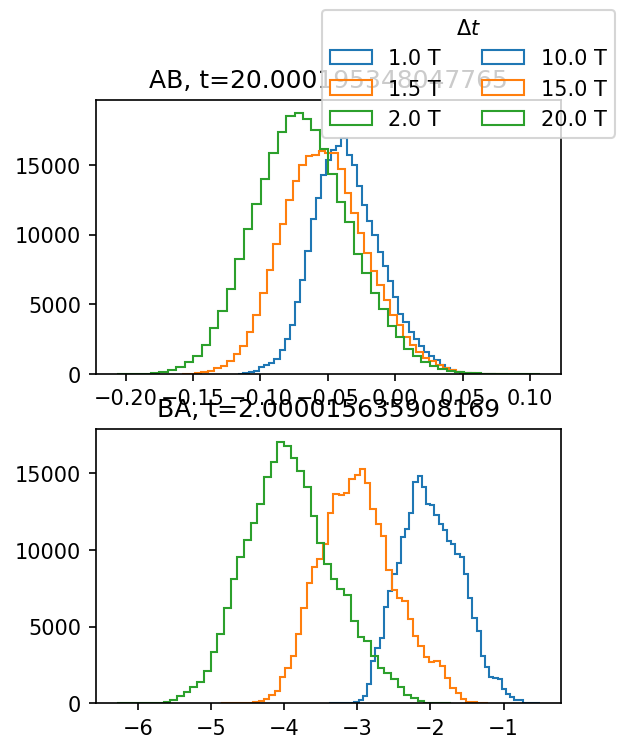

In [44]:
import sys
sys.path.insert(0, '/home/stanley/github/sabaronett/local/athena/athena-dust/vis/python')
import athena_read
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

cases = ['AB', 'BA']
res = 256
fig, axs = plt.subplots(2, 1, figsize=(4, 5.33), dpi=150)
# fig.tight_layout()

for i, case in enumerate(cases):
    path = f'../unstrat/{case}/0.05/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    epsilon = athinput['problem']['epsilon']
    disp = np.load(f'{path}/dat/disp.npz')

    axs[i].set_title(f'{case}, t={t}')

    for j in range(10, 21, 5):
        t, dxp = disp['t'][j], disp['dxp'][j]
        sigma = np.std(dxp)
        print(f'Δt = {t}, σ = {sigma}')
        axs[i].hist(dxp, bins=50, histtype='step', label=f'{t:.1f} T')
    
fig.legend(title=r'$\Delta t$', ncol=2)


Δt = 1.0,	σ = 3.0e-02
Δt = 1.5,	σ = 3.8e-02
Δt = 2.0,	σ = 4.4e-02
Δt = 10.0,	σ = 1.4e-01
Δt = 15.0,	σ = 1.8e-01
Δt = 20.0,	σ = 2.1e-01


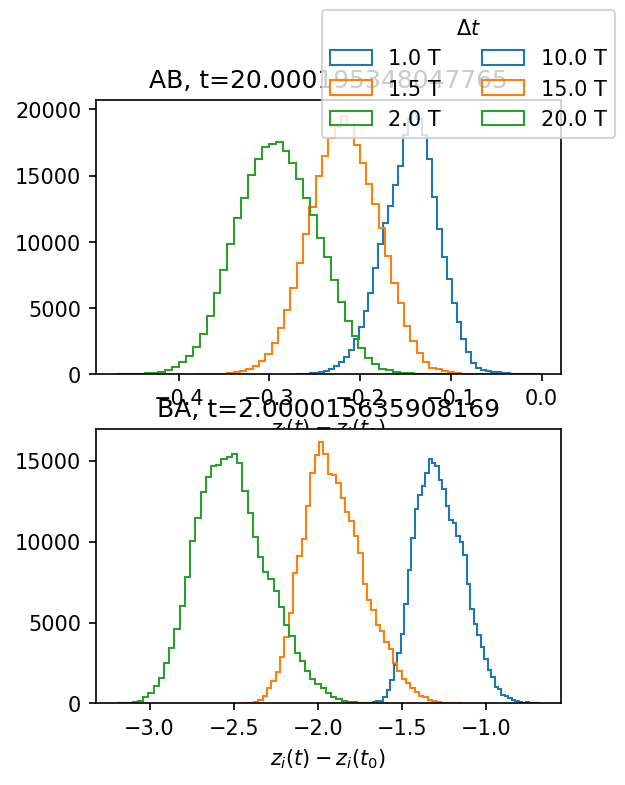

In [48]:
import sys
sys.path.insert(0, '/home/stanley/github/sabaronett/local/athena/athena-dust/vis/python')
import athena_read
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

cases = ['AB', 'BA']
res = 256
fig, axs = plt.subplots(2, 1, figsize=(4, 5.33), dpi=150)
# fig.tight_layout()

for i, case in enumerate(cases):
    path = f'../unstrat/{case}/0.05/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    epsilon = athinput['problem']['epsilon']
    disp = np.load(f'{path}/dat/disp.npz')

    axs[i].set(title=f'{case}, t={t}', xlabel=r'$z_i(t) - z_i(t_0)$')

    for j in range(10, 21, 5):
        t, dzp = disp['t'][j], disp['dzp'][j]
        sigma = np.std(dzp)
        print(f'Δt = {t:.1f},\tσ = {sigma:.1e}')
        axs[i].hist(dzp, bins=50, histtype='step', label=f'{t:.1f} T')
    
fig.legend(title=r'$\Delta t$', ncol=2)


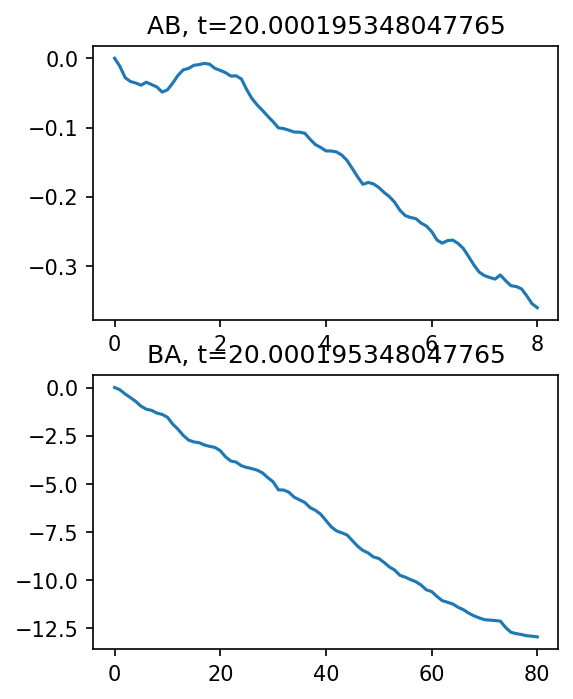

In [43]:
import sys
sys.path.insert(0, '/home/stanley/github/sabaronett/local/athena/athena-dust/vis/python')
import athena_read
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

cases = ['AB', 'BA']
res = 256
fig, axs = plt.subplots(2, 1, figsize=(4, 5.33), dpi=150)
# fig.tight_layout()

for i, case in enumerate(cases):
    path = f'../unstrat/{case}/0.05/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    epsilon = athinput['problem']['epsilon']
    disp = np.load(f'{path}/dat/disp.npz')
    ts, dxps = disp['t'], disp['dxp']

    axs[i].set_title(f'{case}, t={t}')
    axs[i].plot(ts, dxps[:,0])
    
# fig.legend(title=r'$\Delta t$', ncol=2)


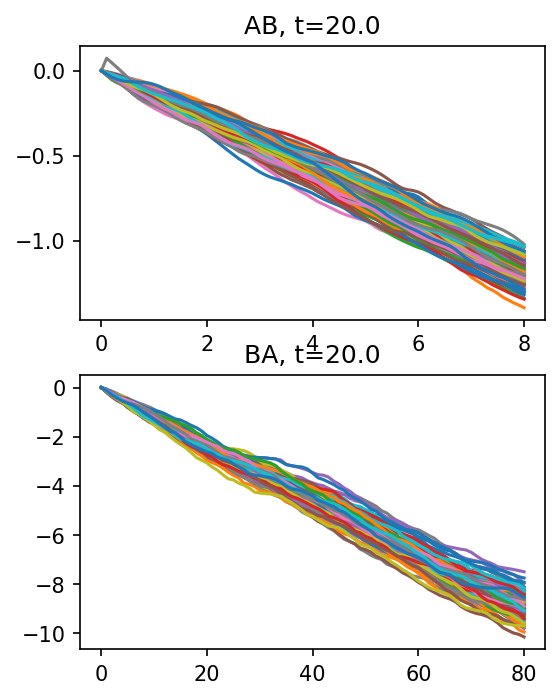

In [53]:
import sys
sys.path.insert(0, '/home/stanley/github/sabaronett/local/athena/athena-dust/vis/python')
import athena_read
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

cases = ['AB', 'BA']
res = 256
fig, axs = plt.subplots(2, 1, figsize=(4, 5.33), dpi=150)
# fig.tight_layout()

for i, case in enumerate(cases):
    path = f'../unstrat/{case}/0.05/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    epsilon = athinput['problem']['epsilon']
    disp = np.load(f'{path}/dat/disp.npz')
    ts, dzps = disp['t'], disp['dzp']

    axs[i].set_title(f'{case}, t={t:.1f}')
    for j in range(0, dzps[0].size, 2621):
        axs[i].plot(ts, dzps[:,j])
